## Topic Modelling with SVD and MNF

In [3]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
np.set_printoptions(suppress=True)

### Looking at Data

In [5]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics','sci.space']
remove = ('headers','footers','quotes')
newsgroup_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroup_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [6]:
newsgroup_train.filenames.shape, newsgroup_train.target.shape

((2034,), (2034,))

In [7]:
print('\n'.join(newsgroup_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [8]:
newsgroup_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [9]:
num_topics, num_top_words = 6,8

### Stop words, Stemming and Lemmatization

In [10]:
from sklearn.feature_extraction import stop_words

sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ujjawalpathak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
from nltk import stem

In [13]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [14]:
word_list = ['went', 'gone','go','going']

In [15]:
[wnl.lemmatize(word) for word in word_list]

['went', 'gone', 'go', 'going']

In [16]:
[porter.stem(word) for word in word_list]

['went', 'gone', 'go', 'go']

In [17]:
word_lists = ['universe','university']

In [18]:
[wnl.lemmatize(word) for word in word_lists]

['universe', 'university']

In [19]:
[porter.stem(word) for word in word_lists]

['univers', 'univers']

In [20]:
import spacy

In [21]:
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups

lookups = Lookups()
lookups.add_table("lemma_rules", {"noun": [["s", ""]]})
lemmatizer = Lemmatizer(lookups)

In [22]:
[lemmatizer.lookup(word) for word in word_list]

['went', 'gone', 'go', 'going']

In [23]:
nlp = spacy.load('en_core_web_sm')

In [24]:
sorted(list(nlp.Defaults.stop_words))[:20]

["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

### Data Preprocessing

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
import nltk

In [27]:
vectorizer = CountVectorizer(stop_words='english')

In [28]:
vectors = vectorizer.fit_transform(newsgroup_train.data).todense()

In [29]:
vectors.shape

(2034, 26576)

In [30]:
print(len(newsgroup_train.data), vectors.shape)

2034 (2034, 26576)


In [31]:
vocab = np.array(vectorizer.get_feature_names())

In [32]:
vocab.shape

(26576,)

In [33]:
vocab[3000:3020]

array(['alexei', 'alexia', 'alexis', 'alfonso', 'alford', 'alfred', 'alg',
       'algebraic', 'algebraically', 'algeria', 'algiers', 'algiorithm',
       'algirithm', 'algo', 'algo_count', 'algonquin', 'algorhtyms',
       'algorithm', 'algorithmic', 'algorithmically'], dtype='<U80')

### Sinngular Value Decomposition

In [34]:
from scipy import linalg
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 45.4 s, sys: 2.2 s, total: 47.6 s
Wall time: 26.4 s


In [35]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [36]:
s[:4]

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

In [37]:
np.diag(s[:4])

array([[433.92698542,   0.        ,   0.        ,   0.        ],
       [  0.        , 291.51012741,   0.        ,   0.        ],
       [  0.        ,   0.        , 240.71137677,   0.        ],
       [  0.        ,   0.        ,   0.        , 220.00048043]])

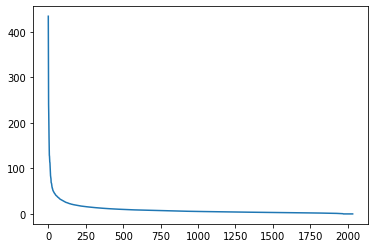

In [38]:
plt.plot(s);

In [41]:
num_words = 8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = [top_words(t) for t in a]
    return [' '.join(t) for t in topic_words]

In [42]:
show_topics(Vh[:10])

['critus ditto propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

### Non-Negative Matrix Factorization

In [43]:
m,n = vectors.shape
d = 5

In [46]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
h1 = clf.components_

In [47]:
show_topics(h1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

### TF-IDF

In [48]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroup_train.data)

In [49]:
newsgroup_train.data[10:15]

["a\n\nWhat about positional uncertainties in S-L 1993e?   I assume we know where\nand what Galileo is doing within a few meters.   But without the\nHGA,  don't we have to have some pretty good ideas, of where to look\nbefore imaging?  If the HGA was working,  they could slew around\nin near real time (Less speed of light delay).  But when they were\nimaging toutatis????  didn't someone have to get lucky on a guess to\nfind the first images?   \n\nAlso, I imagine S-L 1993e will be mostly a visual image.  so how will\nthat affect the other imaging missions.  with the LGA,  there is a real\ntight allocation of bandwidth.   It may be premature to hope for answers,\nbut I thought i'd throw it on the floor.",
 "I would like to program Tseng ET4000 to nonstandard 1024x768 mode by\nswitching to standard 1024x768 mode using BIOS and than changing some\ntiming details (0x3D4 registers 0x00-0x1F) but I don't know how to\nselect 36 MHz pixel clock I need. The BIOS function selects 40 MHz.\n\nIs t

In [51]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [52]:
show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

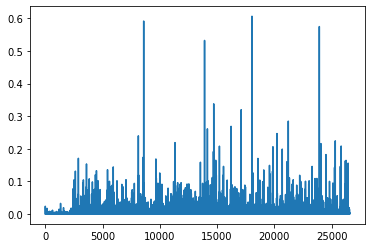

In [53]:
plt.plot(clf.components_[0])

In [54]:
clf.reconstruction_err_

43.71292605795276

### End